In [4]:
import torch
from architecture import *
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import ZeroCLIP as zc


c:\Anaconda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [60]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
params = {
        'embedding_dim': 512,
        'dict_size': 2000,
        'num_layers': 200,
        'lam': 1,
        'step': 0.08,
        'device': device
    }

state = torch.load('data/models/sparse_deep_unrolling2000_200_1.pt')

print(state['W'])
D = state['W'].T

print(D.shape)
print(D.norm(dim=1))

tensor([[-0.0365,  0.0144, -0.0013,  ..., -0.0219, -0.0699, -0.0452],
        [ 0.0153,  0.0274, -0.0065,  ...,  0.0310, -0.0631,  0.0237],
        [ 0.0188, -0.0764, -0.0209,  ..., -0.0082,  0.0409,  0.0396],
        ...,
        [-0.0248,  0.0208, -0.0075,  ...,  0.0020,  0.0279,  0.0384],
        [ 0.0357, -0.0391, -0.0073,  ...,  0.0412, -0.0016, -0.0387],
        [-0.0163, -0.0599, -0.0163,  ...,  0.0612, -0.0254,  0.0057]],
       device='cuda:0')
torch.Size([2000, 512])
tensor([1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000], device='cuda:0')


In [61]:
text_embeddings = np.load("data/dict/mscoco_clip.npy")
text_center = np.mean(text_embeddings, axis=0)

image_embeddings = np.load("data/embeddings/test_raw.npy")
image_center = np.mean(text_embeddings, axis=0)

D_center = D.mean(dim=0)


text_embeddings_centered = torch.tensor(text_embeddings - text_center).to(device).float()
text_embeddings_centered = text_embeddings_centered / text_embeddings_centered.norm(dim=1).unsqueeze(1)

D_centered = D - D_center
D_centered = D_centered / D_centered.norm(dim=1).unsqueeze(1)

torch.Size([2000, 10000])
tensor([7292, 7983, 2579,  ..., 7891, 3455, 4861], device='cuda:0')
tensor([1105,  291,  609,  424, 1640, 1138, 1763,  755, 1387,   26, 1544, 1849,
         114,  949,  764, 1953,  166, 1908, 1791, 1389], device='cuda:0')
participate
care
fifteen
hd
pasadena
men
warehouse
wreath
shift
guests
many
bomber
defect
extremely
artifact
transit
shopped
french
seagulls
pew


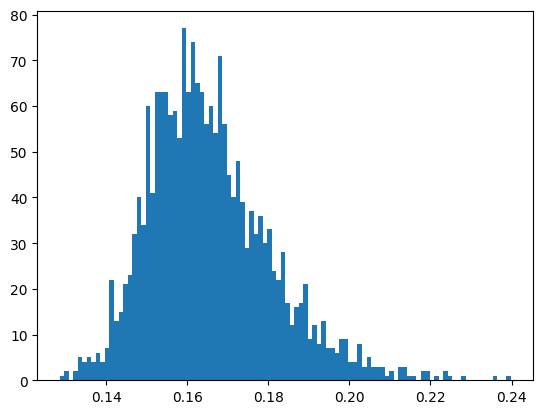

In [62]:
with open('data/dict/mscoco.txt', 'r') as file:
    vocab = file.read().splitlines()
vocab = [w.split(",")[0] for w in vocab]
concepts = vocab[-10000:]


S = torch.matmul(D_centered, text_embeddings_centered.T)

print(S.shape)

print(S.argmax(dim=1))

plt.hist(S.max(dim=1).values.cpu().numpy(), bins=100)

m, i = S.max(dim=1)
top_20_vals = m.argsort(dim=0, descending=True)[:20]
print(top_20_vals)

for j in top_20_vals:
    concepti = i[j]
    print(concepts[concepti])

C:\Users\Alexa\AppData\Local\Temp\ipykernel_28364\1466052733.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  text_embeddings = torch.tensor(text_embeddings) / torch.tensor(text_embeddings).norm(dim=1).unsqueeze(1)


torch.Size([2000, 10000])
tensor([6440, 6696, 4299,  ..., 6008, 3455, 2292], device='cuda:0')


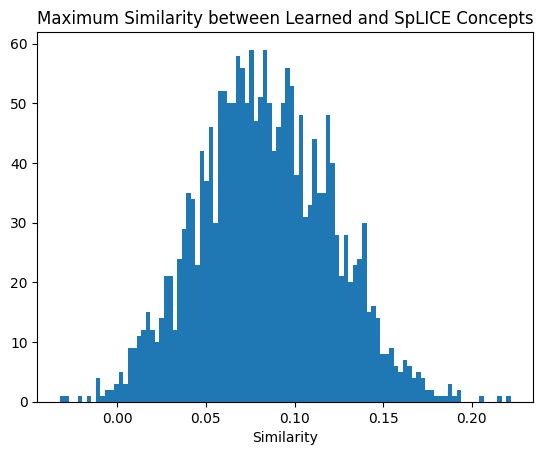

In [64]:
text_embeddings = torch.tensor(text_embeddings) / torch.tensor(text_embeddings).norm(dim=1).unsqueeze(1)
S = torch.matmul(D, text_embeddings.to(device).float().T)

print(S.shape)

print(S.argmax(dim=1))

plt.hist(S.max(dim=1).values.cpu().numpy(), bins=100)
plt.title("Maximum Similarity between Learned and SpLICE Concepts")
plt.xlabel("Similarity")
plt.show()

In [65]:
test_images = np.load("data/embeddings/test_raw.npy")
params = {
        'embedding_dim': 512,
        'dict_size': 2000,
        'num_layers': 200,
        'lam': 1,
        'step': 0.08,
        'device': device
    }

model = SparseDeepUnrolling(W=D.T, **params).to(device)
sparse_represenation = None
for i in tqdm(range(0, test_images.shape[0], 100)):
    images = test_images[i:i+100]
    images = torch.tensor(images).to(device).float().reshape(-1, 512, 1)
    with torch.no_grad():
        _, res = model.forward(images)
    if sparse_represenation is None:
        sparse_represenation = res
    else:
        sparse_represenation = torch.cat((sparse_represenation, res), dim=0)

100%|██████████| 407/407 [00:29<00:00, 14.03it/s]


torch.Size([2000, 512]) torch.Size([40670, 2000, 1])
torch.Size([40670, 512])


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 4.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
        5.000e+00, 3.000e+00, 4.000e+00, 8.000e+00, 3.000e+00, 6.000e+00,
        1.300e+01, 1.000e+01, 1.400e+01, 1.100e+01, 1.400e+01, 1.800e+01,
        1.900e+01, 1.800e+01, 2.100e+01, 1.800e+01, 2.200e+01, 3.700e+01,
        5.300e+01, 4.100e+01, 6.000e+01, 5.900e+01, 6.800e+01, 8.700e+01,
        1.090e+02, 1.140e+02, 1.420e+02, 1.790e+02, 2.120e+02, 2.490e+02,
        3.170e+02, 3.990e+02, 5.050e+02, 5.900e+02, 7.190e+02, 9.420e+02,
        1.147e+03, 1.406e+03, 1.692e+0

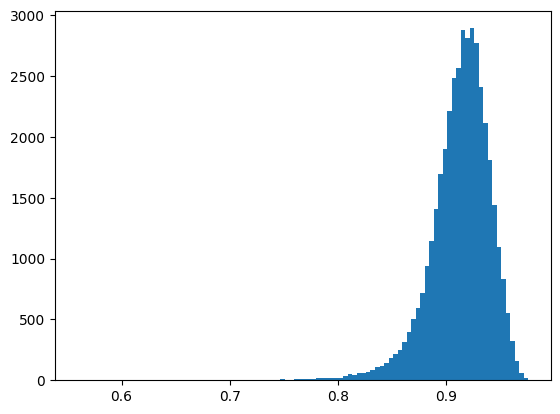

In [66]:
print(D.shape, sparse_represenation.shape) 

xhats = torch.matmul(D.T, sparse_represenation).reshape(-1, 512)

print(xhats.shape)

xs = torch.tensor(test_images).to(device).float().reshape(-1, 512)

sims = (xhats * xs).sum(dim=1) / (xhats.norm(dim=1) * xs.norm(dim=1))

plt.hist(sims.cpu().numpy(), bins=100)

torch.Size([2000, 512]) torch.Size([40670, 512])
torch.Size([2000, 40670])


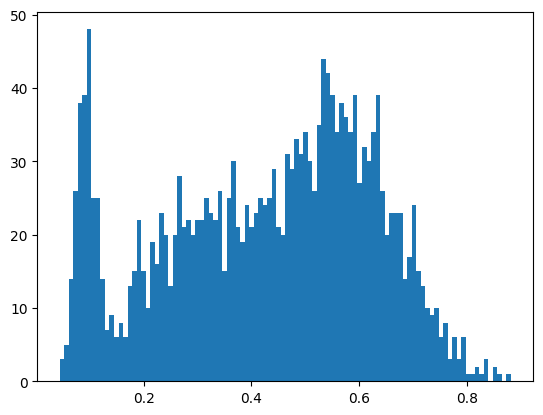

In [67]:
print(D.shape, xs.shape)

all_sims = torch.matmul(D, xs.T) / (D.norm(dim=1).unsqueeze(1) * xs.norm(dim=1).unsqueeze(0))

print(all_sims.shape)
plt.hist(all_sims.max(dim=1).values.cpu().numpy(), bins=100)
plt.show()

In [68]:
## Loading up the embeddings

xs = torch.tensor(test_images).float().reshape(-1, 512).to(device)
xs = xs / xs.norm(dim=1).unsqueeze(1)

zhat = sparse_represenation
xhat = torch.matmul(D.T, zhat).reshape(-1, 512)
xhat = xhat / xhat.norm(dim=1).unsqueeze(1).to(device)

splice_recomp = torch.load("data/embeddings/test_splice_reconstructed_0.2_10000.pt").to(device)
splice_sparse = torch.load("data/embeddings/test_splice_sparse_0.2_10000.pt").to(device)

sim_xhat_xs = (xhat * xs).sum(dim=1)
sim_splice_xs = (splice_recomp * xs).sum(dim=1)



Avg l0 norm zhat: 16.994911193847656, Avg l0 norm splice: 32.370567321777344


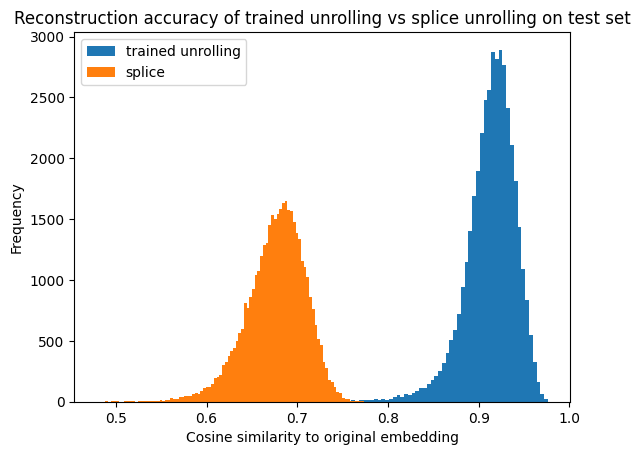

In [69]:
## Reporting average l0 norm and the reconstruction accuracy

l0_norm_zhat = torch.norm(zhat, p=0, dim=1)
l0_norm_splice = torch.norm(splice_sparse, p=0, dim=1)
print(f"Avg l0 norm zhat: {l0_norm_zhat.mean()}, Avg l0 norm splice: {l0_norm_splice.mean()}")


plt.hist(sim_xhat_xs.cpu().numpy(), bins=100)
plt.hist(sim_splice_xs.cpu().numpy(), bins=100)
plt.xlabel("Cosine similarity to original embedding")
plt.ylabel("Frequency")
plt.legend(["trained unrolling", "splice"])
plt.title("Reconstruction accuracy of trained unrolling vs splice unrolling on test set")
plt.show()

In [70]:
## Computing the correlation chart

print(zhat.shape, splice_sparse.shape)

all_features = torch.cat((zhat.reshape(-1, 2000), splice_sparse), dim=1)

print(all_features.shape)

corrs = torch.corrcoef(all_features.T)

torch.Size([40670, 2000, 1]) torch.Size([40670, 10000])
torch.Size([40670, 12000])


tensor([[-0.0040, -0.0043, -0.0095,  ..., -0.0022, -0.0008, -0.0012],
        [-0.0028, -0.0030, -0.0060,  ..., -0.0015, -0.0005, -0.0008],
        [-0.0017, -0.0018, -0.0040,  ..., -0.0009, -0.0003, -0.0005],
        ...,
        [ 0.0162, -0.0022, -0.0048,  ...,  0.0003, -0.0004, -0.0006],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0037,  0.0058,  0.0191,  ..., -0.0020, -0.0007, -0.0011]],
       device='cuda:0')


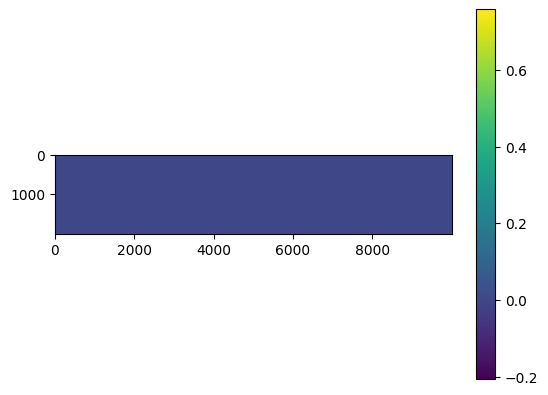

In [71]:
## Plotting this useless image

crossmode_corrs = corrs[:2000, 2000:].nan_to_num()

print(crossmode_corrs)

plt.imshow(crossmode_corrs.cpu().numpy())
plt.colorbar()
plt.show()

tensor([0.1519, 0.2307, 0.1796,  ..., 0.5051, 0.0000, 0.5816], device='cuda:0')


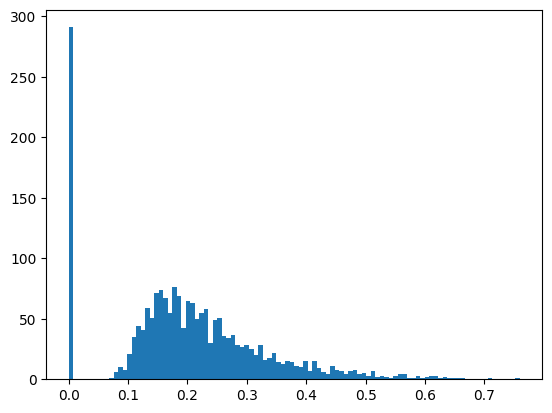

In [72]:
max_corr_for_each_z, max_corr_idx = crossmode_corrs.max(dim=1)
print(max_corr_for_each_z)

plt.hist(max_corr_for_each_z.cpu().numpy(), bins=100)
plt.title("Max Correlation between Learned Concept and SpLICE Concept")
plt.show()

In [73]:
zs_with_high_correlation_t = torch.where(max_corr_for_each_z > 0.5)
print(zs_with_high_correlation_t)

interpretable_features = crossmode_corrs[zs_with_high_correlation_t[0]]

top_corrs, top_idx = interpretable_features.topk(4)
#print(top_corrs, top_idx)

for i in range(top_idx.shape[0]):
    inc_idx = top_idx[i].int().cpu().numpy()
    inc_concepts = []
    for idx in inc_idx:
        inc_concepts.append(concepts[idx])
    inc_corrs = top_corrs[i].cpu().numpy()
    print(f"Feature: {zs_with_high_correlation_t[0][i]}, Description: {list(zip(inc_concepts, inc_corrs))}")

(tensor([  16,   80,  225,  318,  322,  344,  375,  511,  512,  564,  678,  736,
         804,  836,  878,  908,  928,  936,  938,  947,  955,  980, 1048, 1100,
        1106, 1123, 1134, 1173, 1181, 1186, 1305, 1333, 1341, 1356, 1365, 1445,
        1495, 1520, 1544, 1550, 1558, 1585, 1590, 1630, 1665, 1687, 1695, 1788,
        1949, 1985, 1997, 1999], device='cuda:0'),)
Feature: 16, Description: [('cutout', 0.5256349), ('purple', 0.48612663), ('glue', 0.35568944), ('managed', 0.32087368)]
Feature: 80, Description: [('property', 0.5222565), ('wheels', 0.47081903), ('tracking', 0.4520175), ('teapot', 0.42330295)]
Feature: 225, Description: [('landed', 0.5032542), ('dont', 0.40119877), ('blacks', 0.34686545), ('embroidered', 0.32198438)]
Feature: 318, Description: [('daisies', 0.5590455), ('balances', 0.5144831), ('several', 0.4456929), ('ease', 0.4050144)]
Feature: 322, Description: [('exciting', 0.6047158), ('progression', 0.244221), ('when', 0.20019917), ('from', 0.16837724)]
Feature: 

In [74]:

forbidden_tokens_file_path = "./zeroshotimage/forbidden_tokens.npy"
zero_clip = zc.CLIPTextGenerator(forbidden_tokens_file_path=forbidden_tokens_file_path)

In [78]:
baseball_guy = test_images[1]
print(baseball_guy.shape)
baseball_guy_sparse = sparse_represenation[1]

for idx in range(2000):
    if baseball_guy_sparse[idx] > 0:
        top_corr_concepts = crossmode_corrs[idx].topk(5)
        val, indices = top_corr_concepts
        for i, val in zip(indices, val):
            if val > .2:
                print(concepts[i], baseball_guy_sparse[idx] * val)

(512,)
fees tensor([0.7885], device='cuda:0')
macro tensor([0.6170], device='cuda:0')
cereals tensor([0.5774], device='cuda:0')
plating tensor([0.5296], device='cuda:0')
many tensor([0.5053], device='cuda:0')
needle tensor([0.0281], device='cuda:0')
altered tensor([0.0192], device='cuda:0')
plating tensor([2.3261], device='cuda:0')
asian tensor([2.3128], device='cuda:0')
smog tensor([2.2359], device='cuda:0')
rachael tensor([2.1956], device='cuda:0')
seconds tensor([2.1624], device='cuda:0')
shag tensor([0.1458], device='cuda:0')
perfume tensor([0.1403], device='cuda:0')
mistletoe tensor([0.1329], device='cuda:0')
labs tensor([0.1265], device='cuda:0')
scopes tensor([0.1232], device='cuda:0')
skillet tensor([0.0169], device='cuda:0')


In [30]:
import torch
import torchvision
import torchvision.transforms as transforms
import clip

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

batch_size = 20

clip_model, preprocess = clip.load('ViT-B/32', device)

def get_features(dataloader):
    all_features = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in tqdm(dataloader):
            features = clip_model.encode_image(images.to(device))

            all_features.append(features)
            all_labels.append(labels)

    return torch.cat(all_features).cpu().numpy(), torch.cat(all_labels).cpu().numpy()

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=preprocess)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=preprocess)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

test_features, test_labels = get_features(testloader)
train_features, train_labels = get_features(trainloader)



Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 2500/2500 [01:35<00:00, 26.06it/s]


In [12]:
params = {
        'embedding_dim': 512,
        'dict_size': 2000,
        'num_layers': 200,
        'lam': 1,
        'step': 0.08,
        'device': device
    }

model = SparseDeepUnrolling(W=D.T, **params).to(device)

sparse_represenation = None
for i in tqdm(range(0, test_features.shape[0], 100)):
    images = test_features[i:i+100]
    images = torch.tensor(images).to(device).float().reshape(-1, 512, 1)
    with torch.no_grad():
        _, res = model.forward(images)
    if sparse_represenation is None:
        sparse_represenation = res
    else:
        sparse_represenation = torch.cat((sparse_represenation, res), dim=0)

sparse_represenation = sparse_represenation.cpu().numpy()


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:02<00:00, 35.65it/s]


torch.return_types.topk(
values=tensor([[6.3509],
        [0.7685],
        [0.7105],
        [0.6170],
        [0.5923],
        [0.4066],
        [0.3546],
        [0.2343],
        [0.2105],
        [0.1960]]),
indices=tensor([[1691],
        [1851],
        [ 601],
        [ 208],
        [  22],
        [ 834],
        [1064],
        [ 638],
        [1665],
        [ 494]]))
torch.return_types.topk(
values=tensor([[7.2307],
        [1.0207],
        [0.8148],
        [0.7582],
        [0.4013],
        [0.3270],
        [0.2757],
        [0.2184],
        [0.1820],
        [0.1771]]),
indices=tensor([[1691],
        [1851],
        [ 375],
        [ 208],
        [1389],
        [1401],
        [  22],
        [1608],
        [1342],
        [1250]]))


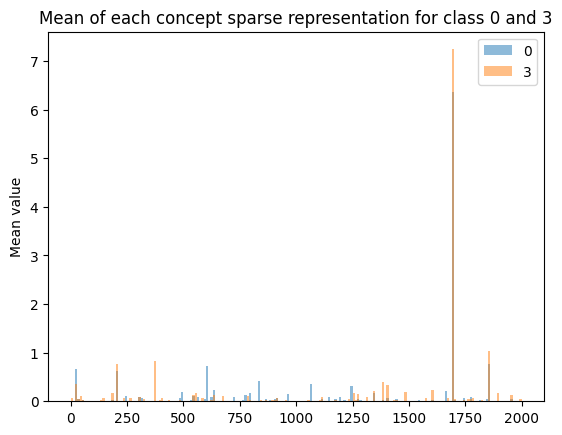

In [29]:
labels = test_labels


for i in [0, 3]:
    idx = np.where(labels == i)
    means = sparse_represenation[idx].mean(axis=0)
    print(torch.tensor(means).topk(10, dim=0))
    plt.hist(list(range(2000)), weights=sparse_represenation[idx].mean(axis=0), bins=200, label=i, alpha=0.5)

plt.title("Mean of each concept sparse representation for class 0 and 3")
plt.legend()
plt.ylabel("Mean value")
plt.show()
   

In [32]:
sparse_represenation_train = None
for i in tqdm(range(0, train_features.shape[0], 100)):
    images = train_features[i:i+100]
    images = torch.tensor(images).to(device).float().reshape(-1, 512, 1)
    with torch.no_grad():
        _, res = model.forward(images)
    if sparse_represenation_train is None:
        sparse_represenation_train = res
    else:
        sparse_represenation_train = torch.cat((sparse_represenation_train, res), dim=0)

sparse_represenation_train = sparse_represenation_train.cpu().numpy()

100%|██████████| 500/500 [01:15<00:00,  6.62it/s]


In [48]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix


lr = LogisticRegression(max_iter=1000)

train_inc_index = np.where((train_labels == 0) | (train_labels == 3))[0]
test_inc_index = np.where((test_labels == 0) | (test_labels == 3))[0]

lr.fit(sparse_represenation_train.reshape(-1, 2000)[train_inc_index], train_labels[train_inc_index])

preds = lr.predict(sparse_represenation.reshape(-1, 2000))

print(classification_report(test_labels[test_inc_index], preds[test_inc_index]))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           3       0.99      0.98      0.99      1000

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [47]:
lr_clip = LogisticRegression(max_iter=1000)

train_inc_index = np.where((train_labels == 0) | (train_labels == 3))[0]
test_inc_index = np.where((test_labels == 0) | (test_labels == 3))[0]

lr_clip.fit(train_features[train_inc_index], train_labels[train_inc_index])

preds = lr_clip.predict(test_features)

print(classification_report(test_labels[test_inc_index], preds[test_inc_index]))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           3       0.99      0.99      0.99      1000

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [50]:
print(np.argsort(lr.coef_))

[[ 601  726  834 ... 1250  375 1489]]


In [51]:
lr = LogisticRegression(max_iter=1000)

train_inc_index = np.where((train_labels == 5) | (train_labels == 3))[0]
test_inc_index = np.where((test_labels == 5) | (test_labels == 3))[0]

lr.fit(sparse_represenation_train.reshape(-1, 2000)[train_inc_index], train_labels[train_inc_index])

preds = lr.predict(sparse_represenation.reshape(-1, 2000))

print(classification_report(test_labels[test_inc_index], preds[test_inc_index]))

              precision    recall  f1-score   support

           3       0.90      0.93      0.92      1000
           5       0.93      0.90      0.91      1000

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.91      2000
weighted avg       0.92      0.92      0.91      2000



In [52]:
lr_clip = LogisticRegression(max_iter=1000)

train_inc_index = np.where((train_labels == 5) | (train_labels == 3))[0]
test_inc_index = np.where((test_labels == 5) | (test_labels == 3))[0]

lr_clip.fit(train_features[train_inc_index], train_labels[train_inc_index])

preds = lr_clip.predict(test_features)

print(classification_report(test_labels[test_inc_index], preds[test_inc_index]))

              precision    recall  f1-score   support

           3       0.94      0.95      0.94      1000
           5       0.95      0.94      0.94      1000

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



In [53]:
lr = LogisticRegression(max_iter=1000)

train_inc_index = np.where((train_labels == 0) | (train_labels == 1))[0]
test_inc_index = np.where((test_labels == 0) | (test_labels == 1))[0]

lr.fit(sparse_represenation_train.reshape(-1, 2000)[train_inc_index], train_labels[train_inc_index])

preds = lr.predict(sparse_represenation.reshape(-1, 2000))

print(classification_report(test_labels[test_inc_index], preds[test_inc_index]))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1000
           1       1.00      0.99      0.99      1000

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [54]:
lr_clip = LogisticRegression(max_iter=1000)

train_inc_index = np.where((train_labels == 0) | (train_labels == 1))[0]
test_inc_index = np.where((test_labels == 0) | (test_labels == 1))[0]

lr_clip.fit(train_features[train_inc_index], train_labels[train_inc_index])

preds = lr_clip.predict(test_features)

print(classification_report(test_labels[test_inc_index], preds[test_inc_index]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Text(0.5, 1.0, 'Accuracy of LR on Sparse vs Dense representation')

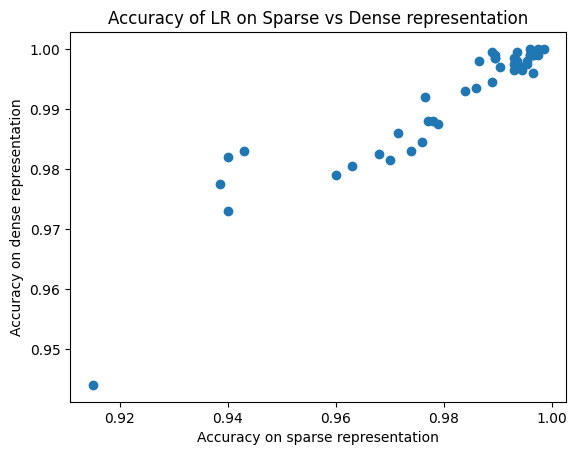

In [56]:
sparse = []
dense = []

for i in range(0, 10):
    for j in range(i+1, 10):
        train_inc_index = np.where((train_labels == i) | (train_labels == j))[0]
        test_inc_index = np.where((test_labels == i) | (test_labels == j))[0]

        lr.fit(sparse_represenation_train.reshape(-1, 2000)[train_inc_index], train_labels[train_inc_index])

        preds = lr.predict(sparse_represenation.reshape(-1, 2000))
        lr_clip.fit(train_features[train_inc_index], train_labels[train_inc_index])

        preds_clip = lr_clip.predict(test_features)
        sparse.append(classification_report(test_labels[test_inc_index], preds[test_inc_index], output_dict=True)['accuracy'])
        dense.append(classification_report(test_labels[test_inc_index], preds_clip[test_inc_index], output_dict=True)['accuracy'])

plt.scatter(sparse, dense)
plt.xlabel("Accuracy on sparse representation")
plt.ylabel("Accuracy on dense representation")
plt.title("Accuracy of LR on Sparse vs Dense representation")

Text(0.5, 1.0, 'Accuracy of LR on Sparse vs Dense representation')

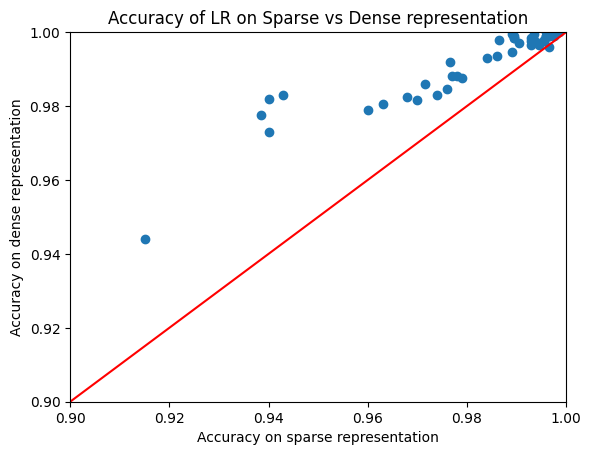

In [58]:
plt.scatter(sparse, dense)
plt.plot([0, 1], [0, 1], color='red')
plt.xlabel("Accuracy on sparse representation")
plt.ylabel("Accuracy on dense representation")
plt.xlim(.9, 1)
plt.ylim(.9, 1)
plt.title("Accuracy of LR on Sparse vs Dense representation")